In [4]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!tar xf /content/drive/MyDrive/Big_data/spark-3.1.1-bin-hadoop3.2.tgz

In [5]:
!pip install pyspark==3.1.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.3/212.3 MB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 18.6 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.1.1-py2.py3-none-any.whl size=212767583 sha256=4513c323994bada1009e18f4c6a01b43354578e304b7a8a910284939c24a3d6c
  Stored in directory: /root/.cache/pip/wheels/a0/3f/72/8efd988f9ae041f051c75e6834cd92dd6d13a726e206e8b6f3
Successfully built pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.7
    Uninstalling py4j-0.10.9.7:
      Successfully uninstalled py4j-0.10.9.7


In [2]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"

In [6]:
from pyspark.sql import SparkSession

In [7]:
ss = SparkSession.builder\
  .appName('Task 2')\
  .getOrCreate()

In [76]:
path = '/content/drive/MyDrive/Big_data/baskets.csv'
df = ss.read.csv(path, header=True)
df.count()

38765

In [99]:
from pyspark.sql import functions as f

new_df = df.select('*').groupBy('Member_number', 'Date', 'year', 'month', 'day')\
  .agg(f.collect_list('itemDescription').alias('basket'))

sort_df = new_df.sort('year', ascending=True)\
  .sort('month', ascending=True)\
  .sort('day', ascending=True)

sort_df.show()

+-------------+----------+----+-----+---+--------------------+
|Member_number|      Date|year|month|day|              basket|
+-------------+----------+----+-----+---+--------------------+
|         4830|01/04/2014|2014|    4|  1|   [soda, ice cream]|
|         2664|01/08/2014|2014|    8|  1|[citrus fruit, pi...|
|         1430|01/12/2014|2014|   12|  1|[soda, canned bee...|
|         1749|01/04/2015|2015|    4|  1|[frankfurter, spe...|
|         1320|01/07/2014|2014|    7|  1|[mayonnaise, proc...|
|         2174|01/05/2014|2014|    5|  1|[brown bread, bot...|
|         1893|01/11/2015|2015|   11|  1|[yogurt, fruit/ve...|
|         1206|01/02/2015|2015|    2|  1| [sausage, cat food]|
|         2884|01/04/2015|2015|    4|  1|[frozen vegetable...|
|         4170|01/08/2015|2015|    8|  1|  [soda, rolls/buns]|
|         2276|01/11/2015|2015|   11|  1|        [soda, pork]|
|         1188|01/09/2015|2015|    9|  1|[whole milk, roll...|
|         2194|01/11/2015|2015|   11|  1|[other vegetab

In [100]:
count_df = sort_df.select('*').groupBy('Date', 'Year').agg(f.count('basket').alias('basket_count'))
count_df = count_df.sort('Date', ascending=True)
count_df.show()

+----------+----+------------+
|      Date|Year|basket_count|
+----------+----+------------+
|01/01/2014|2014|          21|
|01/01/2015|2015|          16|
|01/02/2014|2014|          25|
|01/02/2015|2015|          13|
|01/03/2014|2014|          21|
|01/03/2015|2015|          20|
|01/04/2014|2014|          17|
|01/04/2015|2015|          21|
|01/05/2014|2014|          24|
|01/05/2015|2015|          22|
|01/06/2014|2014|          23|
|01/06/2015|2015|          20|
|01/07/2014|2014|          27|
|01/07/2015|2015|          21|
|01/08/2014|2014|          22|
|01/08/2015|2015|          19|
|01/09/2014|2014|          21|
|01/09/2015|2015|          20|
|01/10/2014|2014|          12|
|01/10/2015|2015|          14|
+----------+----+------------+
only showing top 20 rows



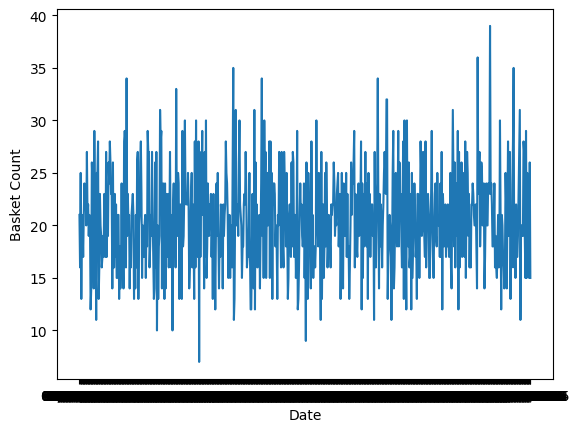

In [101]:
import matplotlib.pyplot as plt
plot_df = count_df.select('*').toPandas()
plt.plot(plot_df['Date'], plot_df['basket_count'])
plt.xlabel('Date')
plt.ylabel('Basket Count')
plt.show()